# Demo: Common Data Model with Cocoon

In this demo, you will learn how to transform a data source (left patient table from Synthea) into [Common Data Model](http://ohdsi.github.io/CommonDataModel/cdm54.html) (right). There are challenges with both the data source and the transformation logic (red).

There are two steps:
1. Documentation: Identify data issues and interactively clean the data source.
2. Transformation: Propose transformation logics and write the corresponding code.

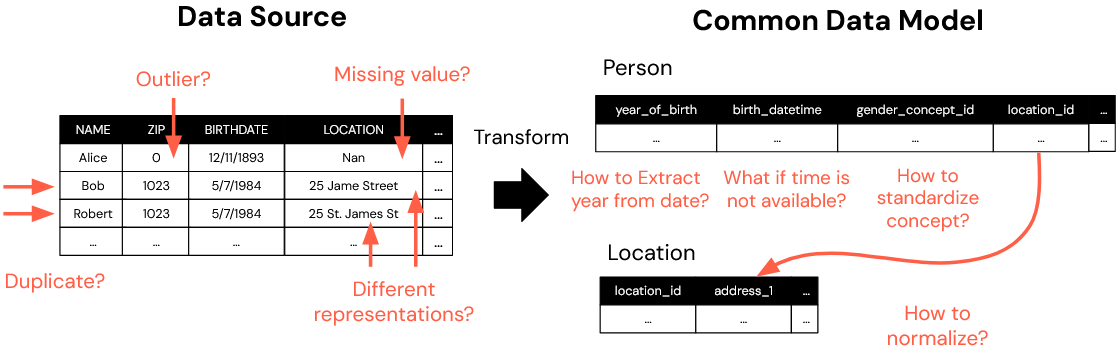





## Prerequisite

1. Install Cocoon
2. Configure OpenAI API Key (To obtain one, refer to [here](https://github.com/Cocoon-Data-Transformation/cocoon/tree/main#openai-api-key))
3. Download files




In [1]:
! pip install cocoon_data==0.1.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 

In [2]:
from cocoon_data import *

In [3]:
# set up your api key
openai.api_key = ""

# test if it works
response = openai.ChatCompletion.create(
    model="gpt-4-1106-preview",
    messages=[
      {"role": "user", "content": "hello!"},
  ]
)

print(response['choices'][0]['message']["content"])

Hello! How can I assist you today?


In [4]:
import requests

# Download the required file for this demo
# Dictionary of file names and their URLs
files = {
    "patients.csv": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients.csv",
    "patients_cocoon_data.json": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients_cocoon_data.json",
    "patients_transformer.json": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients_transformer.json"
}

# Loop through the files dictionary
for file_name, url in files.items():
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open file in binary write mode
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"{file_name} downloaded successfully.")
    else:
        print(f"Failed to download {file_name}.")


patients.csv downloaded successfully.
patients_cocoon_data.json downloaded successfully.
patients_transformer.json downloaded successfully.


## Documentation

Begin by downloading the required files. The documentation process is interactive and should take only a few minutes.


In [6]:
# pass the dataframe and the table name to the cocoon documenter
cocoon_documenter = read_data("./patients.csv")

Congratulation! The document is complete. 🎉

What's next?
1. Use Cleaner 🧹 to clean the data.
2. Use Standardizer 📏 to standardize the data.
3. Use Transformer 🔌 to transform the data.      
...

And more to come! 🚀
🤓 Do you want to save the file?


Text(value='patients_cocoon_data.json', description='File Name:')

Button(description='Save File', style=ButtonStyle())


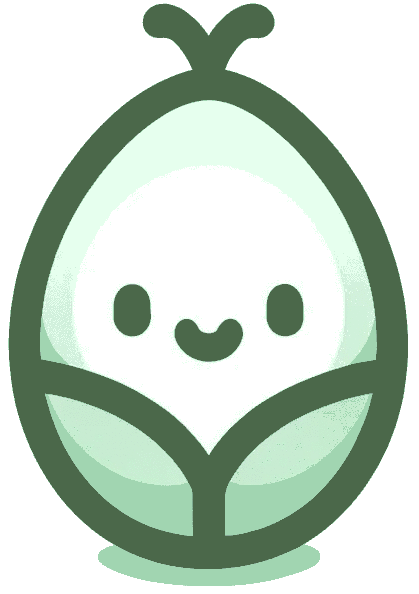

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS_LICENSE,PASSPORT,NAME_PREFIX,FIRST_NAME,LAST_NAME,NAME_SUFFIX,MAIDEN_NAME,MARITAL_STATUS,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,LOCATION_FIPS,ZIP_CODE,LATITUDE,LONGITUDE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,eb247227-e839-88d3-447d-b5972468f33b,2021-09-23,NaN,999-41-1756,NaN,NaN,NaN,Mel236,Bailey598,NaN,NaN,NaN,white,nonhispanic,M,Norton Center Massachusetts US,716 Wunsch Gardens Unit 48,Framingham,Massachusetts,Middlesex County,25017.0,1701,42.275650,-71.476367,2520.80,4323.64,170754
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne169,Marks830,NaN,Lowe577,M,white,nonhispanic,F,Longmeadow Massachusetts US,123 Bayer Camp,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009-02-08,NaN,999-59-2568,NaN,NaN,NaN,Hunter736,Keebler762,NaN,NaN,NaN,white,nonhispanic,M,Maynard Massachusetts US,575 Jast Rue Unit 48,Winchendon,Massachusetts,Worcester County,25027.0,1475,42.670059,-72.074664,16381.92,17447.87,79884
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979-06-26,1995-07-04,999-77-7700,S99968506,NaN,NaN,Herschel574,Ernser583,NaN,NaN,NaN,asian,nonhispanic,M,Somerville Massachusetts US,184 Langworth Parade Apt 10,Boston,Massachusetts,Suffolk County,25025.0,2131,42.395516,-71.059015,3850.00,44057.32,6420
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey714,Heathcote539,NaN,Hegmann834,M,white,nonhispanic,F,Natick Massachusetts US,801 Morissette Divide,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420


/usr/local/lib/python3.10/dist-packages/cocoon_data/__init__.py:1611: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [7]:
# display the document
cocoon_documenter

In [8]:
# save the document as html
cocoon_documenter.save_as_html('./patients.html')

/usr/local/lib/python3.10/dist-packages/cocoon_data/__init__.py:1611: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## Cleaning

As you go through the documentation, various issues will be identified. Now, let's engage in an interactive data cleaning process to resolve these issues and establish a data pipeline.


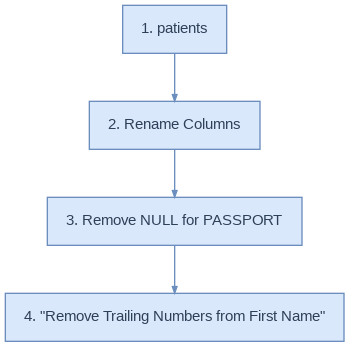

Dropdown(options=('1. patients', '2. Rename Columns', '3. Remove NULL for PASSPORT', '4. "Remove Trailing Numb…

Done


In [9]:
# clean the data
cocoon_cleaner = DataCleaning(cocoon_documenter)
cocoon_cleaner

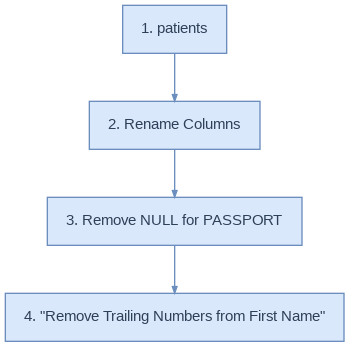

Dropdown(options=('1. patients', '2. Rename Columns', '3. Remove NULL for PASSPORT', '4. "Remove Trailing Numb…

In [10]:
# inspect the cleaning pipeline
cocoon_cleaner.pipeline

In [11]:
# run the cleaning codes and return the cleaned dataframe
cleaned_df = cocoon_cleaner.run_codes()
cleaned_df

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS_LICENSE,PASSPORT,NAME_PREFIX,FIRST_NAME,LAST_NAME,NAME_SUFFIX,MAIDEN_NAME,MARITAL_STATUS,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,LOCATION_FIPS,ZIP_CODE,LATITUDE,LONGITUDE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne,Marks830,NaN,Lowe577,M,white,nonhispanic,F,Longmeadow Massachusetts US,123 Bayer Camp,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey,Heathcote539,NaN,Hegmann834,M,white,nonhispanic,F,Natick Massachusetts US,801 Morissette Divide,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420
6,79297a39-2d2d-d88d-5e47-7a521af1d69f,1998-12-14,NaN,999-49-9846,S99945605,X69843358X,Mr.,Hayden,Casper496,NaN,NaN,NaN,white,nonhispanic,M,Charlton Massachusetts US,589 Conroy Approach,Belmont,Massachusetts,Middlesex County,25017.0,2472,42.361539,-71.209136,40347.11,180076.32,51861
8,750cdaf4-c264-e967-e76b-53a5a61abcab,1983-02-18,NaN,999-95-3792,S99957390,X63804957X,Mr.,Stewart,Schimmel440,NaN,NaN,M,white,nonhispanic,M,Fall River Massachusetts US,843 Yost Spur Unit 81,Sharon,Massachusetts,Norfolk County,25021.0,2067,42.101473,-71.205475,7321.10,176776.70,10335
9,285cba54-c91d-6db4-4d78-1ea35ba6b622,1998-10-30,NaN,999-44-2795,S99942670,X49037240X,Ms.,Jenae,Becker968,NaN,NaN,NaN,white,nonhispanic,F,Somerville Massachusetts US,248 Ernser Terrace Suite 86,Lynn,Massachusetts,Essex County,25009.0,1901,42.498504,-71.035824,34690.56,626729.36,56421
10,064ef124-22ef-af09-1940-0fec6c3574bc,1972-05-01,NaN,999-29-7349,S99945886,X86223344X,Ms.,Andera,Lemke654,NaN,NaN,S,white,nonhispanic,F,Kingston Massachusetts US,606 Price View Unit 89,Boston,Massachusetts,Suffolk County,25025.0,2116,42.428282,-71.030715,591573.83,346350.22,28232
11,df6bcea7-a0c7-6ed0-e9e4-fd1dc33b76f7,1965-08-03,NaN,999-38-7473,S99953338,X64982272X,Mrs.,Linn,Gislason620,NaN,Hermann103,M,white,nonhispanic,F,Westwood Massachusetts US,275 Tromp Burg Suite 54,Erving,Massachusetts,Franklin County,NaN,0,42.636620,-72.383286,54801.69,228252.18,83088
13,52f8df2b-25a8-fbba-af75-0e11f3a054d4,2000-10-21,NaN,999-16-4297,S99952319,X27281996X,Ms.,Cindy,Lueilwitz711,NaN,NaN,NaN,asian,nonhispanic,F,Hanoi Hà Đông VN,892 Haag Gateway Unit 67,Boston,Massachusetts,Suffolk County,25025.0,2120,42.313480,-71.102964,8065.00,917055.49,3758
15,b3b71304-fe5b-bda4-6822-bd901b2836d1,1962-05-14,NaN,999-48-5926,S99948203,X32413718X,Mr.,Antony,Armstrong51,NaN,NaN,M,white,nonhispanic,M,Fall River Massachusetts US,830 Dare Park Apt 34,Marshfield,Massachusetts,Plymouth County,25023.0,2050,42.162630,-70.739816,41148.04,632431.62,35673
16,fd0b726d-b7e6-976d-7cda-8679dd849610,1965-01-01,NaN,999-96-6743,S99949277,X14857165X,Ms.,Daniela,Rico947,NaN,NaN,S,white,hispanic,F,Bayamon Puerto Rico PR,279 Grady Estate,Boston,Massachusetts,Suffolk County,25025.0,2120,42.328519,-71.030266,54097.09,478630.93,93689


In [12]:
# print the cleaning codes
cocoon_cleaner.print_codes()

from cocoon_data import *

df_0 = pd.read_csv('./patients.csv', sep=',', encoding='utf-8') 

# Rename columns in the DataFrame based on column indices to avoid circular issues
def transform(df):
    rename_map = {
        'DRIVERS': 'DRIVERS_LICENSE',
        'PREFIX': 'NAME_PREFIX',
        'FIRST': 'FIRST_NAME',
        'LAST': 'LAST_NAME',
        'SUFFIX': 'NAME_SUFFIX',
        'MAIDEN': 'MAIDEN_NAME',
        'MARITAL': 'MARITAL_STATUS',
        'FIPS': 'LOCATION_FIPS',
        'ZIP': 'ZIP_CODE',
        'LAT': 'LATITUDE',
        'LON': 'LONGITUDE',
    }
    # Create a list of the current column names
    new_column_names = list(df.columns)

    # Find the indices of the columns to be renamed and update their names
    for old_name, new_name in rename_map.items():
        if old_name in df.columns:
            index = df.columns.get_loc(old_name)
            new_column_names[index] = new_name
        else:
            raise ValueError(f'Column LON not found in DataFrame')

    

## Transformation

Excellent, the data is now clean. The next step is to transform it into the common data model. (http://ohdsi.github.io/CommonDataModel/cdm54.html)

In [13]:
# pass the documenter to the cocoon transformer
cocoon_transformer = CDMTransformation(cocoon_cleaner)

# optionally, you can load past transformation
cocoon_transformer.read_document_from_disk('./patients_transformer.json')

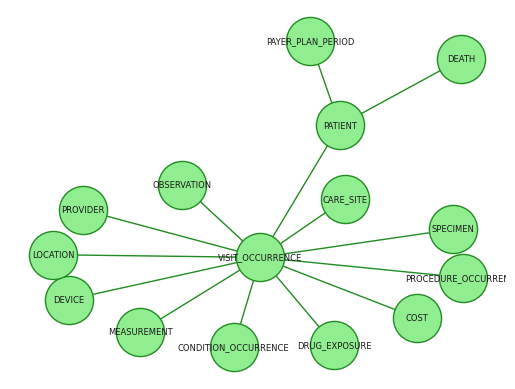

In [14]:
# print out the target tables
cocoon_transformer.display_database()

💻 Writing the codes...


IntProgress(value=1, max=7)

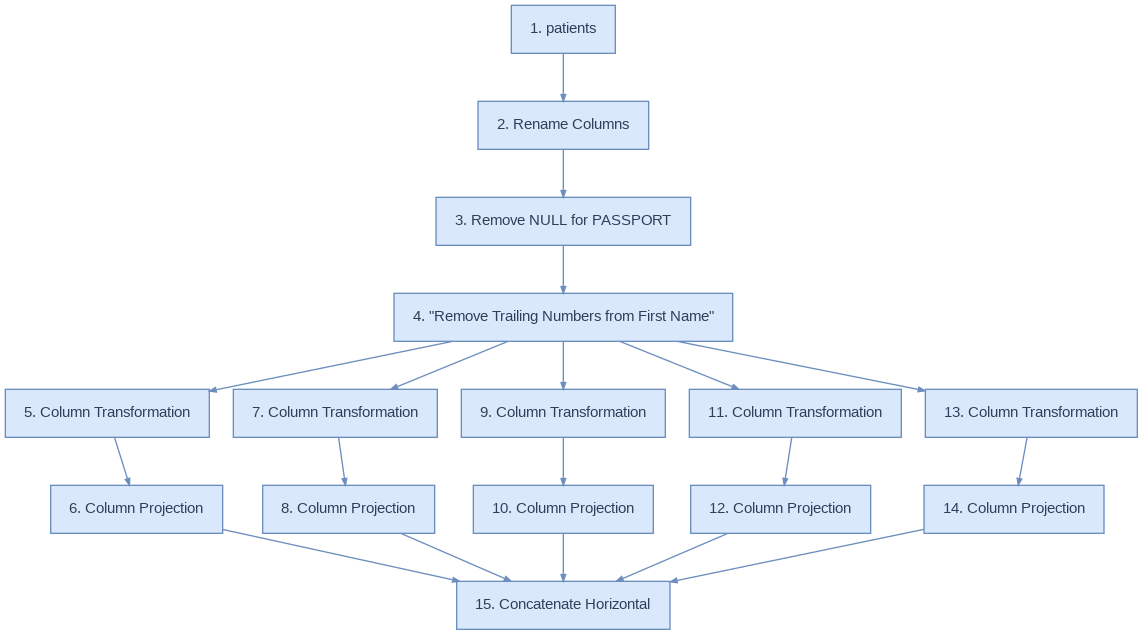

Dropdown(options=('1. patients', '2. Rename Columns', '3. Remove NULL for PASSPORT', '4. "Remove Trailing Numb…

In [15]:
cocoon_transformer.start()

In [16]:
# remember to save the transformation document to disk, so you can load it later
cocoon_transformer.write_document_to_disk('./patients_transformer.json')

In [17]:
# display the transformation codes
cocoon_transformer.pipeline.print_codes()

from cocoon_data import *

df_0 = pd.read_csv('./patients.csv', sep=',', encoding='utf-8') 

# Rename columns in the DataFrame based on column indices to avoid circular issues
def transform(df):
    rename_map = {
        'DRIVERS': 'DRIVERS_LICENSE',
        'PREFIX': 'NAME_PREFIX',
        'FIRST': 'FIRST_NAME',
        'LAST': 'LAST_NAME',
        'SUFFIX': 'NAME_SUFFIX',
        'MAIDEN': 'MAIDEN_NAME',
        'MARITAL': 'MARITAL_STATUS',
        'FIPS': 'LOCATION_FIPS',
        'ZIP': 'ZIP_CODE',
        'LAT': 'LATITUDE',
        'LON': 'LONGITUDE',
    }
    # Create a list of the current column names
    new_column_names = list(df.columns)

    # Find the indices of the columns to be renamed and update their names
    for old_name, new_name in rename_map.items():
        if old_name in df.columns:
            index = df.columns.get_loc(old_name)
            new_column_names[index] = new_name
        else:
            raise ValueError(f'Column LON not found in DataFrame')

    

In [18]:
# run the transformation codes and return the transformed dataframe
target_df = cocoon_transformer.run_codes()
target_df

,person_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,gender_concept_id,gender_source_value,race_concept_id,race_source_value,ethnicity_concept_id,ethnicity_source_value
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944,5,31,1944-05-31,8532,F,8527,white,38003563,nonhispanic
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973,5,31,1973-05-31,8532,F,8527,white,38003563,nonhispanic
6,79297a39-2d2d-d88d-5e47-7a521af1d69f,1998,12,14,1998-12-14,8507,M,8527,white,38003563,nonhispanic
8,750cdaf4-c264-e967-e76b-53a5a61abcab,1983,2,18,1983-02-18,8507,M,8527,white,38003563,nonhispanic
9,285cba54-c91d-6db4-4d78-1ea35ba6b622,1998,10,30,1998-10-30,8532,F,8527,white,38003563,nonhispanic
10,064ef124-22ef-af09-1940-0fec6c3574bc,1972,5,1,1972-05-01,8532,F,8527,white,38003563,nonhispanic
11,df6bcea7-a0c7-6ed0-e9e4-fd1dc33b76f7,1965,8,3,1965-08-03,8532,F,8527,white,38003563,nonhispanic
13,52f8df2b-25a8-fbba-af75-0e11f3a054d4,2000,10,21,2000-10-21,8532,F,8515,asian,38003563,nonhispanic
15,b3b71304-fe5b-bda4-6822-bd901b2836d1,1962,5,14,1962-05-14,8507,M,8527,white,38003563,nonhispanic
16,fd0b726d-b7e6-976d-7cda-8679dd849610,1965,1,1,1965-01-01,8532,F,8527,white,38003564,hispanic
